## Algorithm Evaluation

Pick the best model for a given dataset

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Add the root directory path

In [2]:
import os
import sys

In [3]:
print(os.getcwd())

e:\ETLHive Machine Learning\11 Algo Evaluation


In [4]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
parent_dir

'e:\\ETLHive Machine Learning'

In [5]:
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [6]:
from utils import evaluate_single_model_class, algo_evaluation

## Step 1 -  Data Ingestion

In [7]:
import pandas as pd

df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


## Loan Status is Target Feature

1. 0 - Loan is Rejected
2. 1 - Loan is Approved

## Step 2 - Perform basic Data Quality checks

In [8]:
df.shape

(58645, 13)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [11]:
df.info

<bound method DataFrame.info of           id  person_age  person_income person_home_ownership  \
0          0          37          35000                  RENT   
1          1          22          56000                   OWN   
2          2          29          28800                   OWN   
3          3          30          70000                  RENT   
4          4          22          60000                  RENT   
...      ...         ...            ...                   ...   
58640  58640          34         120000              MORTGAGE   
58641  58641          28          28800                  RENT   
58642  58642          23          44000                  RENT   
58643  58643          22          30000                  RENT   
58644  58644          31          75000              MORTGAGE   

       person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
0                    0.0   EDUCATION          B       6000          11.49   
1                    6.0     MEDI

In [12]:
df.select_dtypes(include="object").nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

## Step 3 - Separate X and Y (Loan_status)

In [13]:
X = df.drop(columns=["id", "loan_status"])
Y = df["loan_status"]

In [14]:
X.value_counts()

person_age  person_income  person_home_ownership  person_emp_length  loan_intent        loan_grade  loan_amnt  loan_int_rate  loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length
20          38000          RENT                   1.0                EDUCATION          A           3200       7.68           0.08                 N                          4                             1
            38400          MORTGAGE               5.0                EDUCATION          A           15000      8.90           0.40                 N                          2                             1
            59000          RENT                   1.0                PERSONAL           B           16800      12.42          0.29                 N                          2                             1
            80000          RENT                   4.0                VENTURE            C           7000       15.96          0.09                 Y                          2      

In [15]:
Y.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

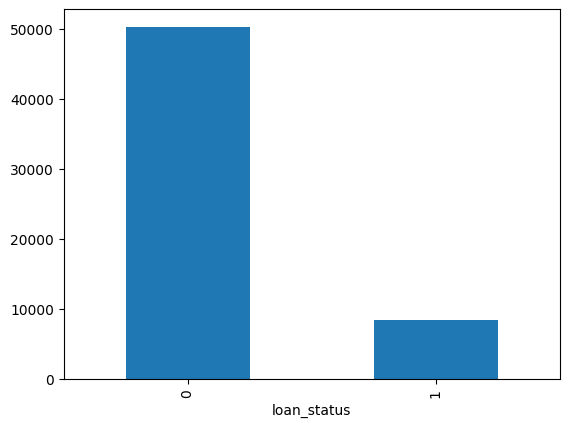

In [68]:
Y.value_counts().plot(kind="bar")

## Step 4 - Train test split

In [16]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [17]:
xtrain.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14337,36,50000,RENT,0.0,HOMEIMPROVEMENT,C,7200,13.85,0.14,Y,15
17117,27,43200,RENT,3.0,DEBTCONSOLIDATION,C,5000,11.66,0.12,Y,9
32590,25,70000,MORTGAGE,0.0,EDUCATION,A,8000,7.88,0.11,N,3
55811,39,75000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,15000,6.54,0.20,N,11
40120,22,45600,RENT,5.0,MEDICAL,A,4000,7.66,0.09,N,2


In [18]:
xtest.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
4657,23,40000,RENT,0.0,MEDICAL,A,3700,8.00,0.09,N,4
56440,25,60000,MORTGAGE,9.0,HOMEIMPROVEMENT,A,5000,8.59,0.08,N,4
42117,32,66300,RENT,0.0,MEDICAL,B,20000,12.53,0.26,N,6
10849,22,30000,RENT,0.0,DEBTCONSOLIDATION,B,5000,10.59,0.17,N,2
39395,27,60000,RENT,1.0,MEDICAL,B,7000,12.21,0.12,N,10


In [19]:
ytest.head()

4657     0
56440    0
42117    1
10849    0
39395    0
Name: loan_status, dtype: int64

In [20]:
ytrain.head()

14337    0
17117    0
32590    0
55811    0
40120    0
Name: loan_status, dtype: int64

In [21]:
xtrain.shape

(46916, 11)

In [22]:
xtest.shape

(11729, 11)

In [23]:
ytrain.shape

(46916,)

In [24]:
ytest.shape

(11729,)

## Step 5 - Apply preprocessing

In [25]:
cat_cols = xtrain.select_dtypes(include="object").columns.tolist()
print(cat_cols)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [26]:
num_cols = xtrain.select_dtypes(include="number").columns.tolist()
print(num_cols)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [28]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [29]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [30]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
).set_output(transform="pandas")

In [31]:
pre.fit(xtrain) # type: ignore

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [32]:
xtrain_pre = pre.transform(xtrain) # type: ignore
xtrain_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
14337,1.397825,-0.366415,-1.182680,-0.359703,1.042717,-0.205762,2.274652,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091851,-0.542752,-0.429373,-0.755235,0.321836,-0.424086,0.787969,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422891,0.152225,-1.182680,-0.215873,-0.922425,-0.533248,-0.698714,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55811,1.894383,0.281885,-0.680475,1.042639,-1.363513,0.449211,1.283530,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40120,-0.919449,-0.480515,0.072832,-0.935022,-0.994843,-0.751573,-0.946495,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
xtest_pre = pre.transform(xtest) # type: ignore
xtest_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
4657,-0.753930,-0.625734,-1.182680,-0.988958,-0.882925,-0.751573,-0.450934,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56440,-0.422891,-0.107095,1.077242,-0.755235,-0.688715,-0.860735,-0.450934,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42117,0.735746,0.056277,-1.182680,1.941575,0.608214,1.104183,0.044628,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,-0.919449,-0.885054,-1.182680,-0.755235,-0.030376,0.121724,-0.946495,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39395,-0.091851,-0.107095,-0.931577,-0.395660,0.502879,-0.424086,1.035750,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 6 - Model building and algo evaluation

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier

In [35]:
xtrain_pre.shape

(46916, 22)

In [36]:
!uv add xgboost

Resolved 70 packages in 4ms
Audited 63 packages in 0.16ms


In [37]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    HistGradientBoostingClassifier(),
    XGBClassifier()
]

In [38]:
best_model, res = algo_evaluation(models, xtrain_pre, ytrain, xtest_pre, ytest)

{'model_name': 'LogisticRegression', 'model': LogisticRegression(), 'cv_mean': np.float64(0.7929), 'cv_std': np.float64(0.0071), 'f1_train': 0.793, 'f1_test': 0.7867, 'gen_err': 0.0063}
{'model_name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'cv_mean': np.float64(0.8268), 'cv_std': np.float64(0.0023), 'f1_train': 1.0, 'f1_test': 0.8179, 'gen_err': 0.1821}
{'model_name': 'RandomForestClassifier', 'model': RandomForestClassifier(), 'cv_mean': np.float64(0.8855), 'cv_std': np.float64(0.0058), 'f1_train': 1.0, 'f1_test': 0.8891, 'gen_err': 0.1109}
{'model_name': 'HistGradientBoostingClassifier', 'model': HistGradientBoostingClassifier(), 'cv_mean': np.float64(0.8913), 'cv_std': np.float64(0.0045), 'f1_train': 0.8993, 'f1_test': 0.8918, 'gen_err': 0.0075}
{'model_name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_

In [39]:
res

,model_name,model,cv_mean,cv_std,f1_train,f1_test,gen_err
0,HistGradientBoostingClassifier,HistGradientBoostingClassifier(),0.8913,0.0045,0.8993,0.8918,0.0075
1,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.8901,0.0057,0.9229,0.8939,0.0290
2,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.8855,0.0058,1.0000,0.8891,0.1109
3,DecisionTreeClassifier,DecisionTreeClassifier(),0.8268,0.0023,1.0000,0.8179,0.1821
4,LogisticRegression,LogisticRegression(),0.7929,0.0071,0.7930,0.7867,0.0063


In [40]:
best_model

,loss,'log_loss'
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,None
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


## Above model has good f1 macro in train and test and cv and generalization error is also low

## Step 7 - Evaluate Selected Model in detail

In [ ]:
best_model.score(xtrain_pre, ytrain) # type: ignore

0.9553883536533379

In [ ]:
best_model.score(xtest_pre, ytest) # type: ignore

0.9523403529712678

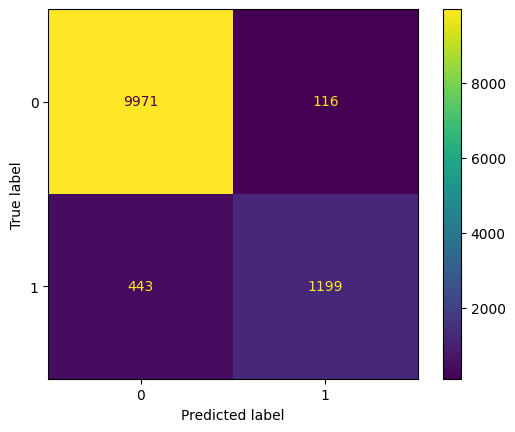

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, xtest_pre, ytest)


In [ ]:
ypred_test = best_model.predict(xtest_pre) # type: ignore
ypred_test[0:5]

array([0, 0, 0, 0, 0])

In [45]:
ytest.head()

4657     0
56440    0
42117    1
10849    0
39395    0
Name: loan_status, dtype: int64

In [46]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.91      0.73      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.93      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



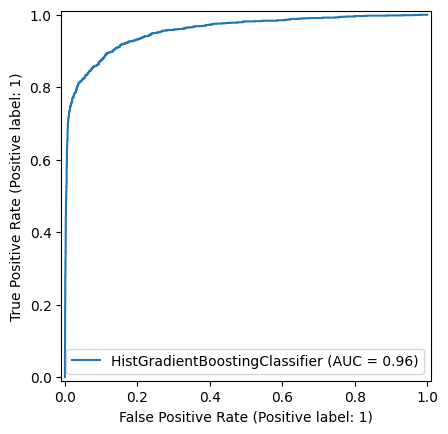

In [47]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_model, xtest_pre, ytest)

## From above results the model can be used for out of sample data

## Step 8 - Out of Sample prediction

In [49]:
xnew = pd.read_csv("test_loan.csv")
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [50]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [ ]:
xnew_pre = pre.transform(xnew) # type: ignore
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,-0.753930,0.126293,-0.429373,2.840512,1.671432,2.195805,-0.946495,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.257371,0.826456,0.323935,0.143702,0.657589,-0.642411,-0.450934,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.257371,-0.885054,0.072832,-0.935022,2.142144,-0.314924,-0.946495,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.901266,-0.366415,-0.178270,-0.395660,-0.586672,-0.205762,0.292408,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.257371,0.982048,0.826140,1.042639,1.855767,-0.096600,-0.450934,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
preds = best_model.predict(xnew_pre) # type: ignore
preds[0:5]

array([1, 0, 0, 0, 0])

In [ ]:
best_model.classes_ # type: ignore

array([0, 1])

In [ ]:
probs = best_model.predict_proba(xnew_pre)[:, 1] # type: ignore
probs[0:5]

array([0.98992453, 0.01886616, 0.49399838, 0.01327998, 0.05169213])

In [55]:
final_res = xnew[["id"]]
final_res["loan_status"] = preds
final_res["probability"] = probs.round(4)

In [56]:
final_res

,id,loan_status,probability
0,58645,1,0.9899
1,58646,0,0.0189
2,58647,0,0.4940
3,58648,0,0.0133
4,58649,0,0.0517
...,...,...,...
39093,97738,0,0.0543
39094,97739,0,0.0076
39095,97740,0,0.0145
39096,97741,0,0.3040


In [57]:
final_res["loan_status"].value_counts()

loan_status
0    34938
1     4160
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

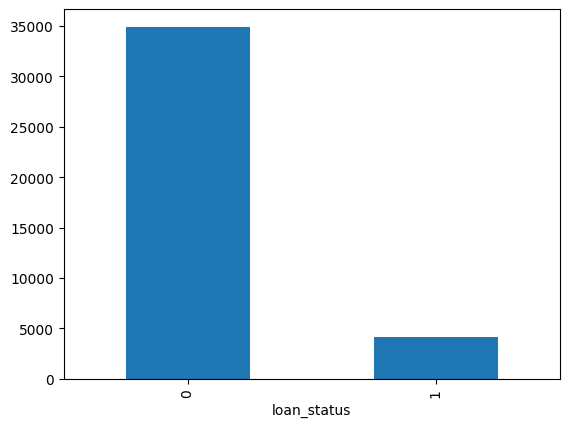

In [58]:
final_res["loan_status"].value_counts().plot(kind="bar")

In [59]:
final_res.to_csv("loan_results.csv", index=False)

## Step 9 - Save the pre and model

In [60]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [61]:
best_model

,loss,'log_loss'
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,None
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


In [62]:
import joblib
joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [63]:
joblib.dump(best_model, "loan_model.joblib")

['loan_model.joblib']

## Load pre and models

In [64]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [65]:
m = joblib.load("loan_model.joblib")
m

,loss,'log_loss'
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,None
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


In [66]:
m.score(xtrain_pre, ytrain)

0.9553883536533379

In [67]:
m.score(xtest_pre, ytest)

0.9523403529712678